In [1]:
import numpy as np
from scipy.integrate import quad

import matplotlib.pyplot as plt

In [2]:
def stress(w):
    sigma = lambda t: np.sin(w * t)
    dsigma = lambda t: np.cos(w * t)
    
    return (sigma, dsigma)

In [3]:
'''
def creep(elastic_moduli, viscosities):
    E = np.array(elastic_moduli)
    tau = np.array(viscosities) / E[1:]
    
    J = lambda t: 1/ E[0] + np.sum((1 - np.exp(- np.atleast_1d(t)[:, None] / tau[None, :])) / E[None, 1:], axis=1)
    
    return J
'''

'\ndef creep(elastic_moduli, viscosities):\n    E = np.array(elastic_moduli)\n    tau = np.array(viscosities) / E[1:]\n    \n    J = lambda t: 1/ E[0] + np.sum((1 - np.exp(- np.atleast_1d(t)[:, None] / tau[None, :])) / E[None, 1:], axis=1)\n    \n    return J\n'

In [38]:
def creep(elastic_moduli, viscosities):
    E = np.array(elastic_moduli).reshape(-1, 1)
    tau = np.array(viscosities).reshape(-1, 1) / E[1:, :]
    
    J_single = lambda t: 1/ E[0, :] + np.sum((1 - np.exp(- t / tau)) / E[1:, :])
    J = lambda t_array: np.array([J_single(t) for t in t_array]).reshape(t_array.shape)
    
    return J

In [5]:
'''
def calculate_strain(stress_func, creep_func, t):
    def calculate_strain_single_t(stress_func, creep_func, dt):
        sigma, dsigma = stress_func
        integrand = lambda t_p: creep_func(dt - t_p) * dsigma(t_p)
        strain_single_t = sigma(0) * creep_func(dt) + quad(integrand, 0, dt)[0]
        return strain_single_t

    strain = np.concatenate([calculate_strain_single_t(sigma, J, dt) for dt in t])
    return strain
'''

'\ndef calculate_strain(stress_func, creep_func, t):\n    def calculate_strain_single_t(stress_func, creep_func, dt):\n        sigma, dsigma = stress_func\n        integrand = lambda t_p: creep_func(dt - t_p) * dsigma(t_p)\n        strain_single_t = sigma(0) * creep_func(dt) + quad(integrand, 0, dt)[0]\n        return strain_single_t\n\n    strain = np.concatenate([calculate_strain_single_t(sigma, J, dt) for dt in t])\n    return strain\n'

In [51]:
def calculate_strain(time_array, E_mods, viscs, freq=1):
    def calculate_strain_single_t(stress_funcs, creep_func, dt):
        dt = np.array(dt).reshape(1)
        sigma, dsigma = stress_funcs
        integrand = lambda t_p: creep_func(dt - t_p) * dsigma(t_p)
        strain_single_t = sigma(0) * creep_func(dt) + quad(integrand, 0, dt)[0]
        return strain_single_t
    
    stress_funcs = stress(freq)
    creep_func = creep(E_mods, viscs)
    strain = np.array([calculate_strain_single_t(stress_funcs, creep_func, dt) for dt in t])
    return strain

In [49]:
E_mods = [1,10,1]
viscs = [20,20]

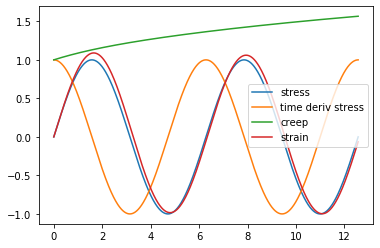

In [50]:
t = np.linspace(0, 4*np.pi, 1000)

plt.plot(t, sigma(t))
plt.plot(t, dsigma(t))
plt.plot(t, J(t))
plt.plot(t, calculate_strain(t, E_mods, viscs))

plt.legend(['stress', 'time deriv stress', 'creep', 'strain'])


In [2]:
def stress(w):
    sigma = lambda t: np.sin(w * t)
    dsigma = lambda t: np.cos(w * t)
    
    return (sigma, dsigma)


def creep(elastic_moduli, viscosities):
    E = np.array(elastic_moduli)
    tau = np.array(viscosities) / E[1:]
    
    J = lambda t: 1/ E[0] + np.sum((1 - np.exp(- np.atleast_1d(t)[:, None] / tau[None, :])) / E[None, 1:], axis=1)
    
    return J


def calculate_strain(stress_func, creep_func, t):
    def calculate_strain_single_t(stress_func, creep_func, dt):
        sigma, dsigma = stress_func
        integrand = lambda t_p: creep_func(dt - t_p) * dsigma(t_p)
        strain_single_t = sigma(0) * creep_func(dt) + quad(integrand, 0, dt)[0]
        return strain_single_t

    strain = np.concatenate([calculate_strain_single_t(stress_func, creep_func, dt) for dt in t])
    return strain

In [ ]:
def stress(w, t):
    sigma = np.sin(w * t)
    dsigma = np.cos(w * t)
    
    return sigma, dsigma


def creep(elastic_moduli, viscosities, t):
    E = np.array(elastic_moduli)
    tau = np.array(viscosities) / E[1:]
    
    J = 1/ E[0] + np.sum((1 - np.exp(- np.atleast_1d(t)[:, None] / tau[None, :])) / E[None, 1:], axis=1)
    
    return J


def calculate_strain(stress_func, creep_func, t, stress_args, creep_args):
    def calculate_strain_single_t(stress_func, creep_func, dt, stress_args, creep_args):
        sigma, dsigma = stress_func
        integrand = lambda t_p: creep_func(dt - t_p) * stress_func()
        strain_single_t = sigma(0) * creep_func(dt) + quad(integrand, 0, dt)[0]
        return strain_single_t

    strain = np.concatenate([calculate_strain_single_t(sigma, J, dt) for dt in t])
    return strain

# V2.0; Differentiating with pytorch

In [19]:
import numpy as np
from scipy.integrate import quad
import torch

import matplotlib.pyplot as plt

In [69]:
def stress(w):
    sigma = lambda t: torch.sin(w * torch.tensor(t))
    dsigma = lambda t: torch.cos(w * torch.tensor(t))
    
    return (sigma, dsigma)

In [70]:
def creep(elastic_moduli, viscosities):
    E = torch.tensor(elastic_moduli)
    tau = torch.tensor(viscosities) / E[1:]
    
    J = lambda t: 1/ E[0] + torch.sum((1 - torch.exp(-t[:, None] / tau[None, :])) / E[None, 1:], dim=1)
    
    return J

In [71]:
sigma = stress(0.5)
J = creep([1.0, 1.0, 1.0], [200.0, 1.0])

/Users/alexanderbrandon-bravo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/Users/alexanderbrandon-bravo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


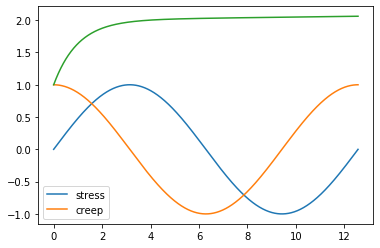

In [72]:
t = torch.linspace(0, 4*np.pi, 1000, requires_grad=True)

plt.plot(t.detach().numpy(), sigma[0](t).detach().numpy())
plt.plot(t.detach().numpy(), sigma[1](t).detach().numpy())
plt.plot(t.detach().numpy(), J(t).detach().numpy())

plt.legend(['stress', 'creep'])

In [79]:
def calculate_strain_single_t(stress_func, creep_func, dt):
    sigma, dsigma = stress_func
    integrand = lambda t_p: (creep_func(dt - t_p) * dsigma(t_p)).detach().numpy()
    strain_single_t = sigma(torch.tensor(0)) * creep_func(dt) + quad(integrand, 0, dt)[0]
    return strain_single_t

In [80]:
calculate_strain_single_t(sigma, J, t[0][None])

/Users/alexanderbrandon-bravo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor([0.], grad_fn=<AddBackward0>)

In [82]:
def calculate_strain(stress_func, creep_func, t):
    def calculate_strain_single_t(stress_func, creep_func, dt):
        sigma, dsigma = stress_func
        integrand = lambda t_p: (creep_func(dt - t_p) * dsigma(t_p)).detach().numpy()
        strain_single_t = sigma(torch.tensor(0)) * creep_func(dt) + quad(integrand, 0, dt)[0]
        return strain_single_t

    strain = torch.cat([calculate_strain_single_t(sigma, J, dt[None]) for dt in t])
    return strain

In [84]:
strain = calculate_strain(sigma, J, t)

/Users/alexanderbrandon-bravo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/Users/alexanderbrandon-bravo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  """


In [85]:
strain

tensor([ 0.0000e+00,  1.2658e-02,  2.5473e-02,  3.8441e-02,  5.1562e-02,
         6.4831e-02,  7.8248e-02,  9.1808e-02,  1.0551e-01,  1.1935e-01,
         1.3333e-01,  1.4745e-01,  1.6170e-01,  1.7607e-01,  1.9058e-01,
         2.0521e-01,  2.1997e-01,  2.3485e-01,  2.4984e-01,  2.6496e-01,
         2.8019e-01,  2.9553e-01,  3.1098e-01,  3.2654e-01,  3.4221e-01,
         3.5798e-01,  3.7385e-01,  3.8982e-01,  4.0590e-01,  4.2206e-01,
         4.3832e-01,  4.5468e-01,  4.7112e-01,  4.8765e-01,  5.0427e-01,
         5.2097e-01,  5.3775e-01,  5.5462e-01,  5.7156e-01,  5.8858e-01,
         6.0567e-01,  6.2283e-01,  6.4007e-01,  6.5737e-01,  6.7474e-01,
         6.9218e-01,  7.0968e-01,  7.2724e-01,  7.4486e-01,  7.6254e-01,
         7.8027e-01,  7.9806e-01,  8.1590e-01,  8.3379e-01,  8.5173e-01,
         8.6972e-01,  8.8776e-01,  9.0583e-01,  9.2395e-01,  9.4212e-01,
         9.6031e-01,  9.7855e-01,  9.9682e-01,  1.0151e+00,  1.0335e+00,
         1.0518e+00,  1.0702e+00,  1.0887e+00,  1.1

In [87]:
test_dict = {'strain_exists': True}

In [89]:
if 'strain_exists' in test_dict.keys():
    print('hurray')

hurray


### Library funcsss

In [ ]:
def mech_library_stress(data, prediction, library_config):
    # Calculating strain and derivs
    if 'stress_exists' in library_config.keys():
        theta_stress= library_config['theta_stress']
    else:
        stress = library_config['stress_func'](data)
        stress_derivs = library_deriv(data, stress, library_config)
        theta_strain = torch.cat((stress, stress_derivs[:, 1:]), dim=1)
        library_config['theta_stress'] = theta_stress
        library_config['stress_exists'] = True
  
    # Calculating strain and derivs
    strain_derivs = library_deriv(data, prediction, library_config)
    theta_strain = torch.cat((prediction, strain_derivs[:, 1:]), dim=1)
    
    # Combining it all
    strain_t = theta_strain[:, 1:2]
    theta = torch.cat((theta_strain[:, :1], theta_strain[:, 2:], theta_stress), dim=1)
    
    return [strain_t], theta


In [ ]:
def mech_library(data, prediction, library_config):
    # Not sure if having 2 additional arguements will cause an issue for the deepmod implementation. Might need to build these into the library_config dictionary instead
    
    '''
    Constructs a library graph in 1D. Library config is dictionary with required terms.
    
    data in this case is strictly the time data
    prediction can be either stress or strain, but must be the data calculated as a result of the feedfoward run of the NN.
    Input_Expression is the analytical functional form of the stress or the strain, whichever is input. It must be differentiatable. This is a SymPy expression to allow for analytical differentiation.
    library_config should be a dictionary stating the max order of differential and need specify nothing more
    Input_Type should be either stress or strain and will determine primarily which data are placed into Strain_t (derived from input expression or prediction) and which data is placed in the first columns of theta.
    
    '''
    
    max_order = library_config['diff_order']
    
    #Begin by computing the values of the terms corresponding to the input, for which an analytical expression is given. du_1 always corresponds to this. This only needs to be done for the very first epoch, after which the values are known and stored in the library_config dictionary.
    
    if ('theta_from_input' in library_config) and (library_config['theta_from_input'].shape[0] == data.shape[0]):
        du_1 = library_config['theta_from_input']
    else:
        t = sym.symbols('t', real=True)
        du_1 = torch.tensor([])
        Expression = library_config['input_expr'] 
        for order in range(max_order+1):
            if order > 0:
                Expression = Expression.diff(t)
            
            x = vedg.Eval_Array_From_Expression(data.detach(), t, Expression)                
            du_1 = torch.cat((du_1, x), dim=1)
            
        library_config['theta_from_input'] = du_1
    
    #Next use the result of the feedforward pass of the NN to calculate derivatives of your prediction with respect to time. This always corresponds to du_2
    du_2 = prediction #.clone()
    for order in range(1, max_order+1):
        y = grad(du_2[:, [order-1]], data, grad_outputs=torch.ones_like(prediction), create_graph=True)[0]
        #removed '[:, 1:2]' from very end of grad()[] statement
        du_2 = torch.cat((du_2, y), dim=1)
    
    Input_Type = library_config['input_type']
    if not (Input_Type == ('Strain' or 'Stress')):
        print('Improper description of input choice. Defaulting to \'Strain\'')
        Input_Type = 'Strain'
    
    if Input_Type == 'Strain':
        Strain = du_1
        Stress = du_2
    else:
        Strain = du_2
        Stress = du_1
    
    Strain_t = Strain[:, [1]] # Extract the first time derivative of strain
    Strain = torch.cat((Strain[:, [0]], Strain[:, 2:]), dim=1) # remove this before it gets put into theta
    Strain *= -1 # The coefficient of all strain terms will always be negative. rather than hoping deepmod will find these negative terms, we assume the negative factor here and later on DeepMoD will just find positive coefficients
    theta = torch.cat((Strain, Stress), dim=1) # I have arbitrarily set the convention of making Strain the first columns of data
    
    return [Strain_t], thetaa
